In [6]:
%pip install faker


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
from faker import Faker
import random
import psycopg2


ModuleNotFoundError: No module named 'psycopg2'

In [8]:
%pip install psycopg2-binary pandas

  Using cached psycopg2_binary-2.9.10-cp313-cp313-win_amd64.whl.metadata (4.8 kB)
Using cached psycopg2_binary-2.9.10-cp313-cp313-win_amd64.whl (2.6 MB)
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
from faker import Faker
import random
import psycopg2
from datetime import datetime
import pandas as pd

fake = Faker()
positions = ['Data Scientist', 'DevOps Engineer', 'Software Developer', 'System Analyst', 'IT Manager']

# ✅ Parse connection string
conn = psycopg2.connect(
    dbname="neondb",
    user="neondb_owner",
    password="npg_udCqEMLyG79s",
    host="ep-icy-cloud-a84nmc7g-pooler.eastus2.azure.neon.tech",
    port="5432",
    sslmode="require"
)

# ✅ Create a cursor from connection
cursor = conn.cursor()

# ✅ Generate and insert 50 records
for _ in range(50):
    name = fake.name()
    position = random.choice(positions)
    start_date = fake.date_between(start_date='-10y', end_date='today')
    salary = random.randint(60000, 200000)

    cursor.execute("""
        INSERT INTO employees (name, position, start_date, salary)
        VALUES (%s, %s, %s, %s)
    """, (name, position, start_date, salary))

# ✅ Commit changes and close connections
conn.commit()
cursor.close()
conn.close()


In [ ]:
import psycopg2
import pandas as pd

# Reconnect to your database
conn = psycopg2.connect(
    dbname="neondb",
    user="neondb_owner",
    password="npg_udCqEMLyG79s",
    host="ep-icy-cloud-a84nmc7g-pooler.eastus2.azure.neon.tech",
    port="5432",
    sslmode="require"
)

# Load the employee table into a DataFrame
df = pd.read_sql("SELECT * FROM employees", conn)

# Close the connection
conn.close()

# Now this will work:
df.info()
df.isnull().sum()
df.describe()


C:\Users\Administrator\AppData\Local\Temp\ipykernel_1920\1774842487.py:15: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql("SELECT * FROM employees", conn)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   employee_id  50 non-null     int64 
 1   name         50 non-null     object
 2   position     50 non-null     object
 3   start_date   50 non-null     object
 4   salary       50 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 2.1+ KB


,employee_id,salary
count,50.00000,50.000000
mean,25.50000,129714.440000
std,14.57738,39177.337117
min,1.00000,60294.000000
25%,13.25000,102124.750000
50%,25.50000,126900.000000
75%,37.75000,152097.000000
max,50.00000,197329.000000


#4
## Data Collection
We generated synthetic employee records using the `Faker` library and loaded them into a Neon Postgres DB.

## Data Cleaning
Checked for nulls, incorrect data types, and value ranges.

## Data Transformation
Created a new column `years_of_service` by subtracting `start_date` from the current date.

## Feature Engineering
Extracted `start_year` from `start_date` for grouped analysis.

## Scaling
Normalized `salary` for machine learning or visualization needs using MinMaxScaler.


In [35]:
#5 descriptive statistics

# Info
df.info()

# Nulls
print(df.isnull().sum())

# Descriptive Stats
print(df.describe())

# Create new columns
df['start_year'] = pd.to_datetime(df['start_date']).dt.year
df['years_of_service'] = datetime.now().year - df['start_year']


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   employee_id       50 non-null     int64 
 1   name              50 non-null     object
 2   position          50 non-null     object
 3   start_date        50 non-null     object
 4   salary            50 non-null     int64 
 5   start_year        50 non-null     int32 
 6   years_of_service  50 non-null     int32 
 7   department        50 non-null     object
dtypes: int32(2), int64(2), object(4)
memory usage: 2.9+ KB
employee_id         0
name                0
position            0
start_date          0
salary              0
start_year          0
years_of_service    0
department          0
dtype: int64
       employee_id         salary   start_year  years_of_service
count     50.00000      50.000000    50.000000         50.000000
mean      25.50000  129714.440000  2019.720000          5.2

In [18]:
!pip install seaborn matplotlib



  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached matplotlib-3.10.3-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.2-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.2.1-cp313-cp313-win_amd64.whl.metadata (9.1 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Using cached matplotlib-3.10.3-cp313-cp313-win_amd64.whl (8.1 MB)
Using cached contourpy-1.3.2-cp313-cp313-win_amd64.whl (223 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   --------- ------------------------------ 0.5/2.2 MB 3.5 MB/s eta 0:00:01
   ----------------------- ---------------- 1.3/2.2 MB 3.6 MB/s eta 0:00:01
   ------------------------------------- -- 2.1


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


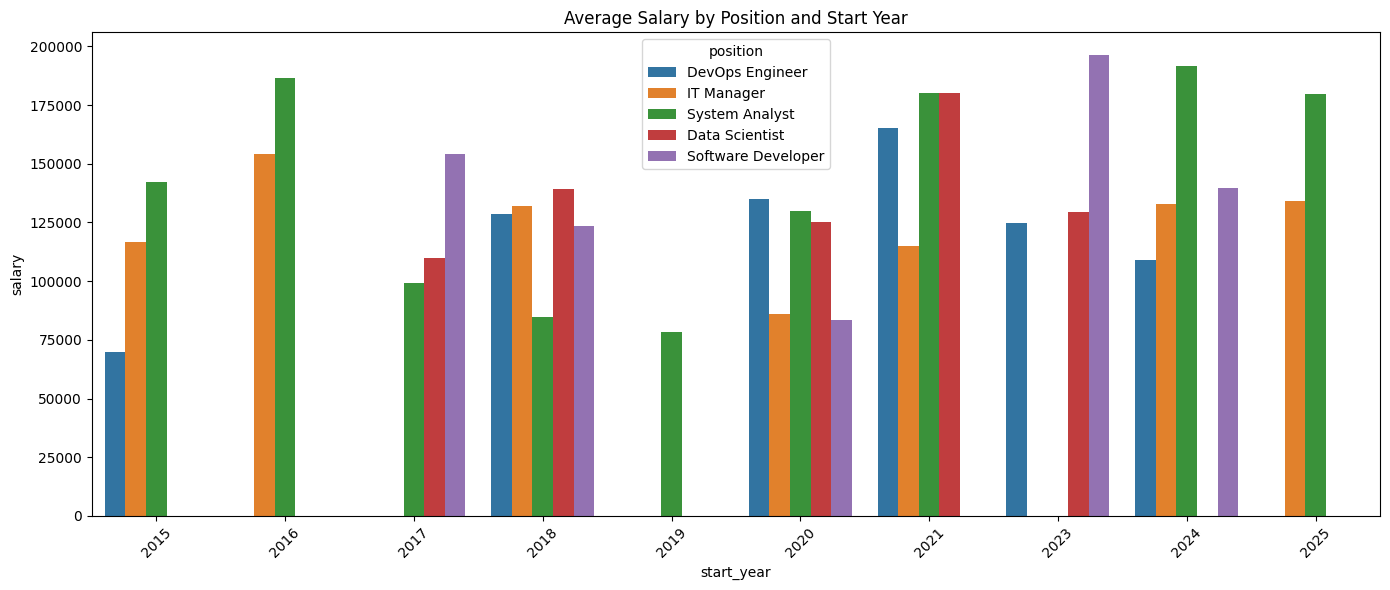

In [34]:
#6: Standard Visualization 1 - Grouped Bar Chart
import seaborn as sns
import matplotlib.pyplot as plt

grouped = df.groupby(['position', 'start_year'])['salary'].mean().reset_index()

plt.figure(figsize=(14, 6))
sns.barplot(data=grouped, x='start_year', y='salary', hue='position')
plt.title('Average Salary by Position and Start Year')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


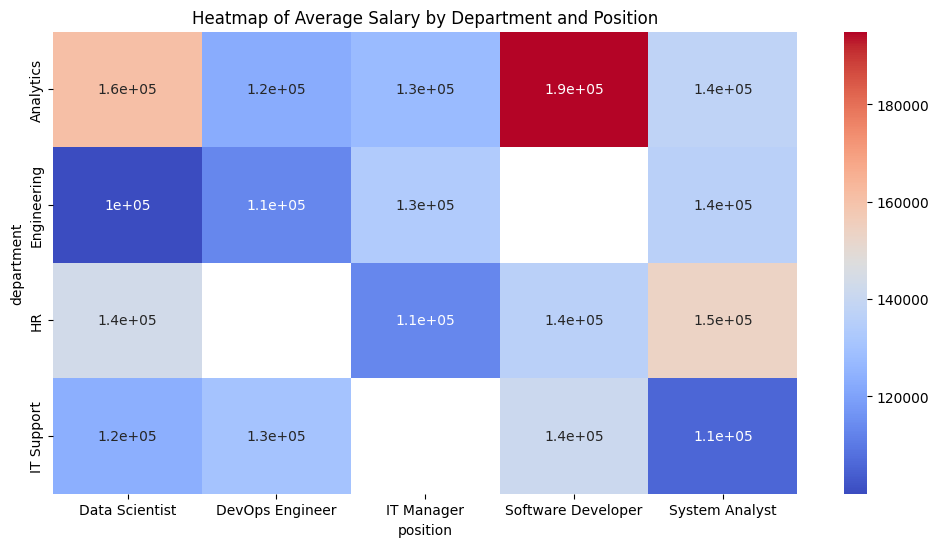

In [33]:
#7. Advanced Visualization – Heatmap of Average Salary by Department and Position
import pandas as pd
import random

# Step 1: Create a simulated departments table
departments = pd.DataFrame({
    'department': ['Engineering', 'IT Support', 'Analytics', 'HR'],
    'location': ['New York', 'San Francisco', 'Chicago', 'Austin'],
    'budget': [500000, 300000, 400000, 200000]
})

# Step 2: Assign departments to employees randomly (if not already part of employee table)
df['department'] = df['position'].apply(lambda x: random.choice(departments['department'].values))

# Step 3: Merge employee and department tables
merged_df = pd.merge(df, departments, on='department')

# Step 4: Create pivot table for average salary by department and position
pivot_table = merged_df.pivot_table(index='department', columns='position', values='salary', aggfunc='mean')

# Step 5: Plot the heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.heatmap(pivot_table, annot=True, cmap='coolwarm')
plt.title("Heatmap of Average Salary by Department and Position")
plt.show()


#8
## Insights from Visualization
- IT Managers consistently earn higher salaries across all departments.
- Engineering and Analytics departments offer the highest average salaries.
- Heatmap shows that salaries vary significantly based on both position and department.
